In [34]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

sns.set_context('notebook')
matplotlib.rcParams['axes.labelsize'] = 25
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 17
matplotlib.rcParams['text.color'] = 'k'

In [246]:
df = pd.read_csv('Forecast3.csv',dayfirst=True)
#Indexing the dates
#format = '%d.%m.%Y'
#df['Posting period'] = pd.to_datetime(df['Posting period'], format=format)
df = df.set_index(pd.DatetimeIndex(df['Posting period']))
df.index
df.head()

,Posting period,Mexico,Argentina,Chile,Other Conosur (Bol/Per/Uru),Brazil,Colombia,Ecuador,Peru,Venezuela(Bol.R),Caribe
Posting period,,,,,,,,,,,
2015-01-01,01.01.2015,13054.861216,6387.879429,1175.000028,1006.486060,4938.999993,4874.249215,2906.999999,1437.999979,2397.999999,7847.000112
2015-01-02,01.02.2015,14653.245782,7665.894889,1106.758264,1125.733670,9493.999981,6302.572298,2470.999999,1552.000016,3058.999994,8890.000061
2015-01-03,01.03.2015,17711.860626,11092.400412,1343.099707,1553.252033,13966.000009,5235.863566,2413.999992,2147.528587,2793.999993,10857.495058
2015-01-04,01.04.2015,14714.165992,10967.026270,1824.999989,1356.402942,9401.999987,5585.366677,2622.000000,1334.043620,-7490.000002,8892.999932
2015-01-05,01.05.2015,16485.796197,10406.698982,1913.999986,1143.423202,14231.999985,6083.215209,744.999991,1355.746533,250.000008,8910.495095


In [249]:
print(df.shape)

(36, 11)


In [224]:
print(df.columns)

Index(['Posting period', 'Mexico', 'Argentina', 'Chile',
       'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru',
       'Venezuela(Bol.R)', 'Caribe'],
      dtype='object')


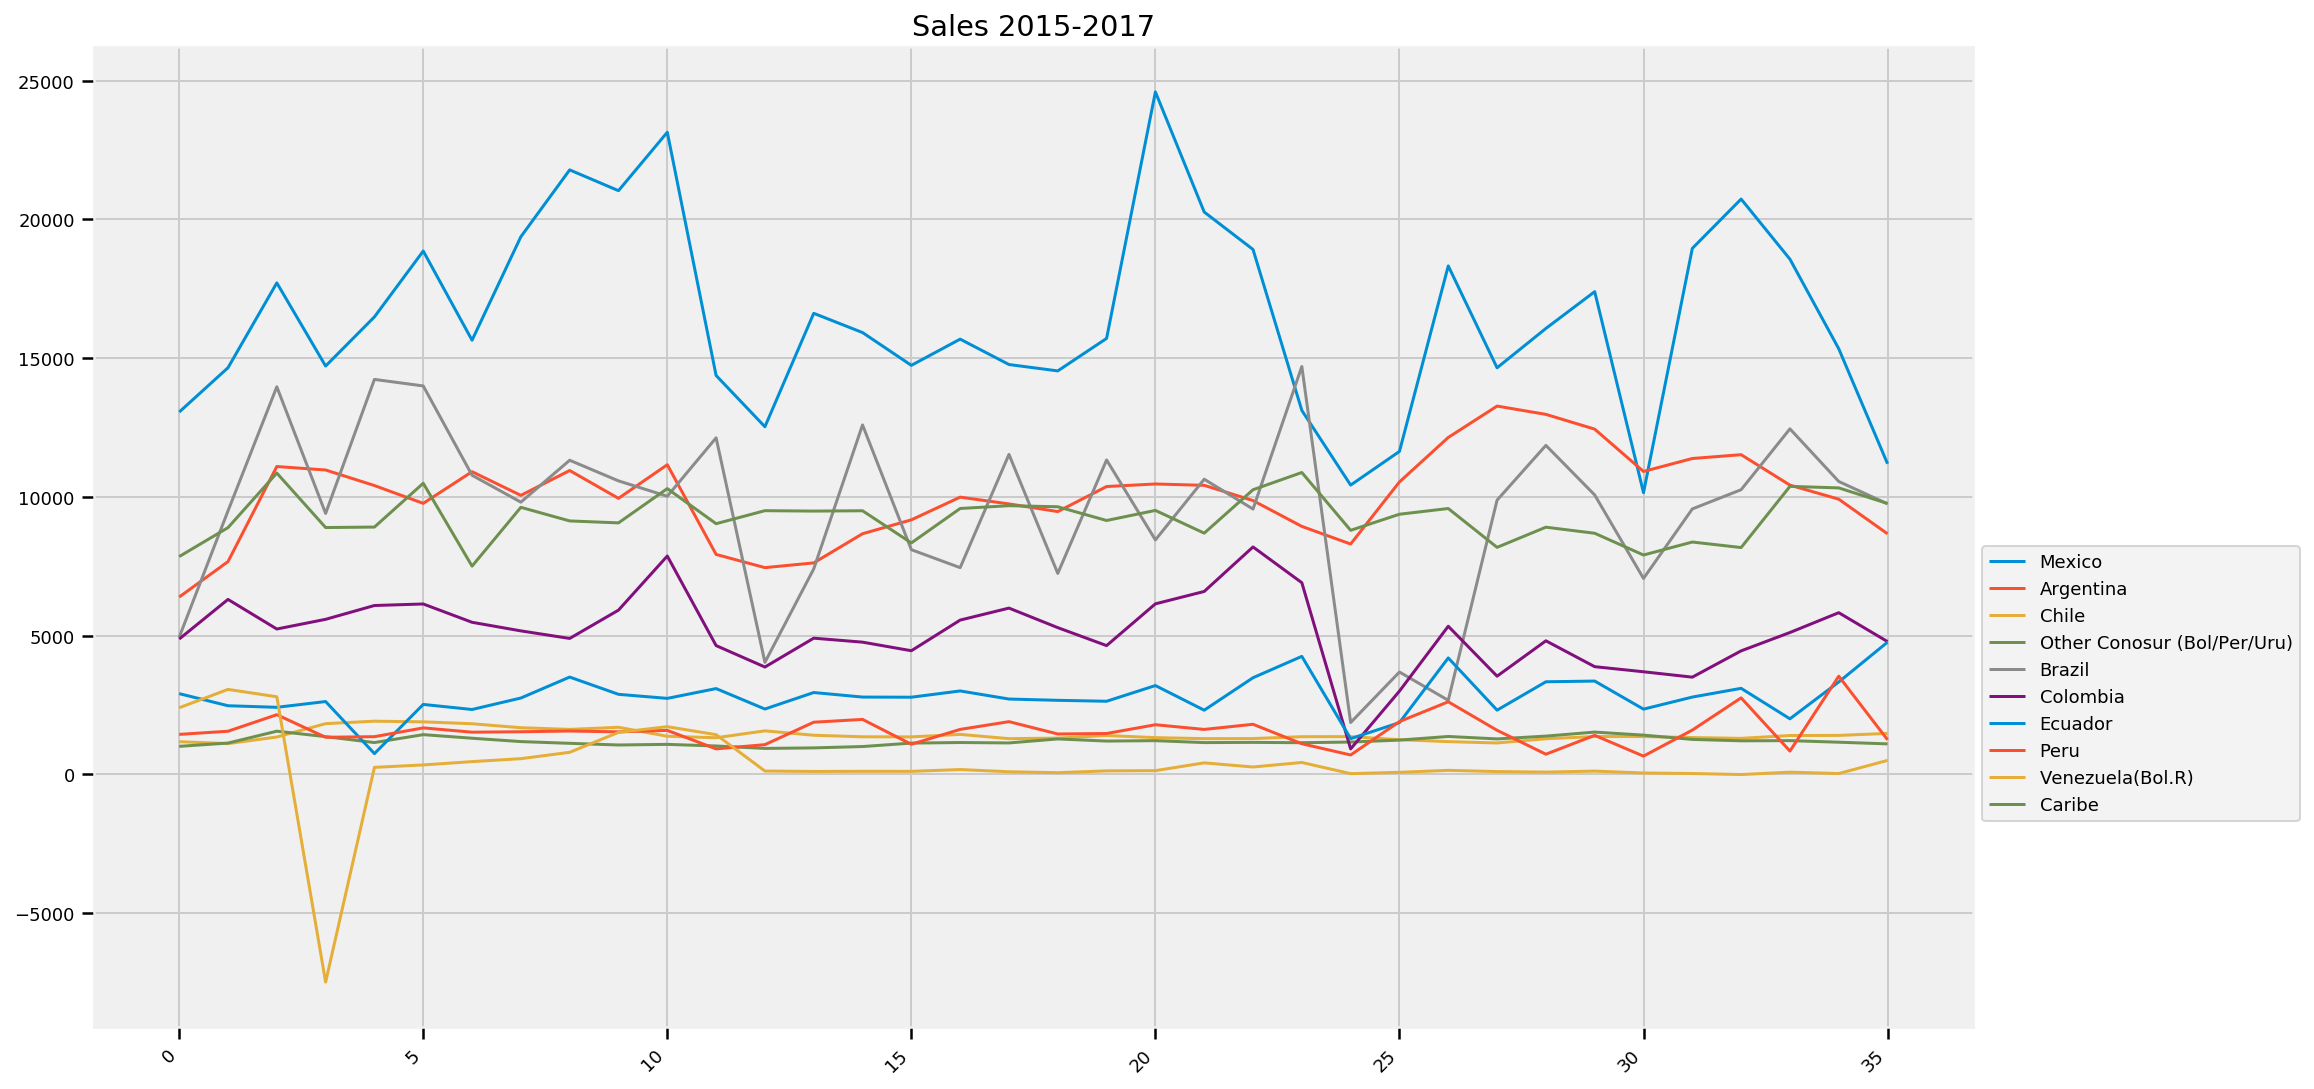

In [225]:
import matplotlib.pylab as pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
a=False
b=True
df.plot (kind='line',figsize =(15,10), use_index=a, title='Sales 2015-2017', logy = a, rot=45, fontsize=9)
plt.legend(loc='0', bbox_to_anchor=(1, 0.5), fontsize=9)



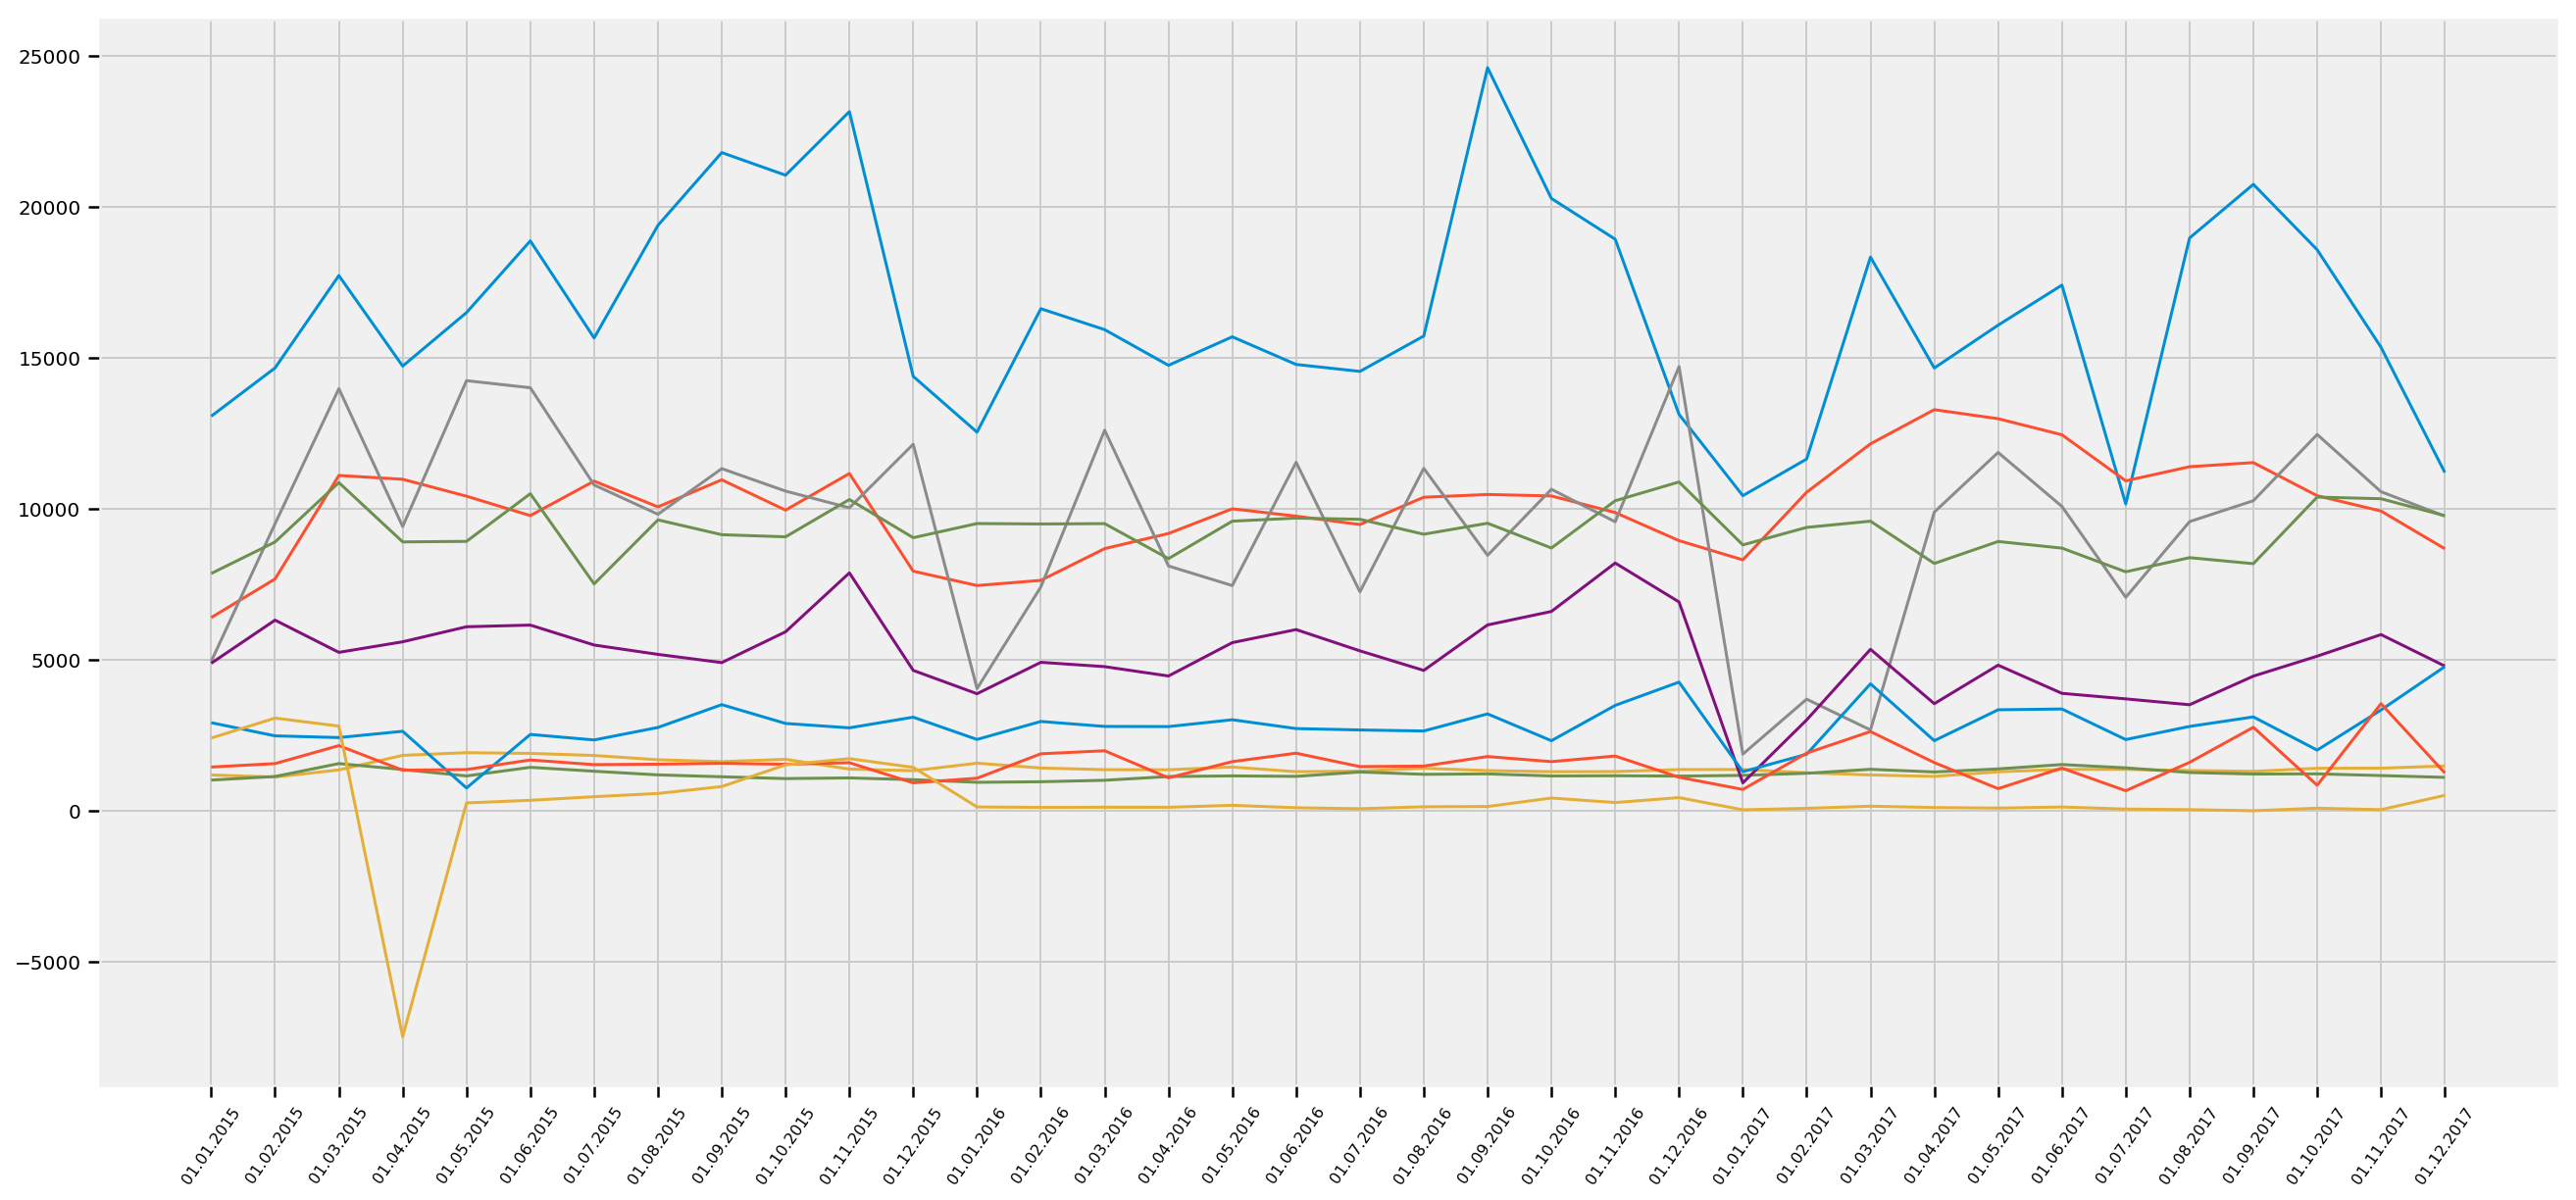

In [147]:
plt.figure(figsize=(20,10)) 
plt.xticks( rotation=55)
plt.plot(df)
plt.show()


In [264]:
#ploting reagions
mexico = df[df.columns[1:2]]
conosur = df[df.columns[2:5]]
brazil = df[df.columns[5:6]]
andean = df[df.columns[6:10]]
caribe = df[df.columns[10:11]]

<Figure size 432x288 with 0 Axes>

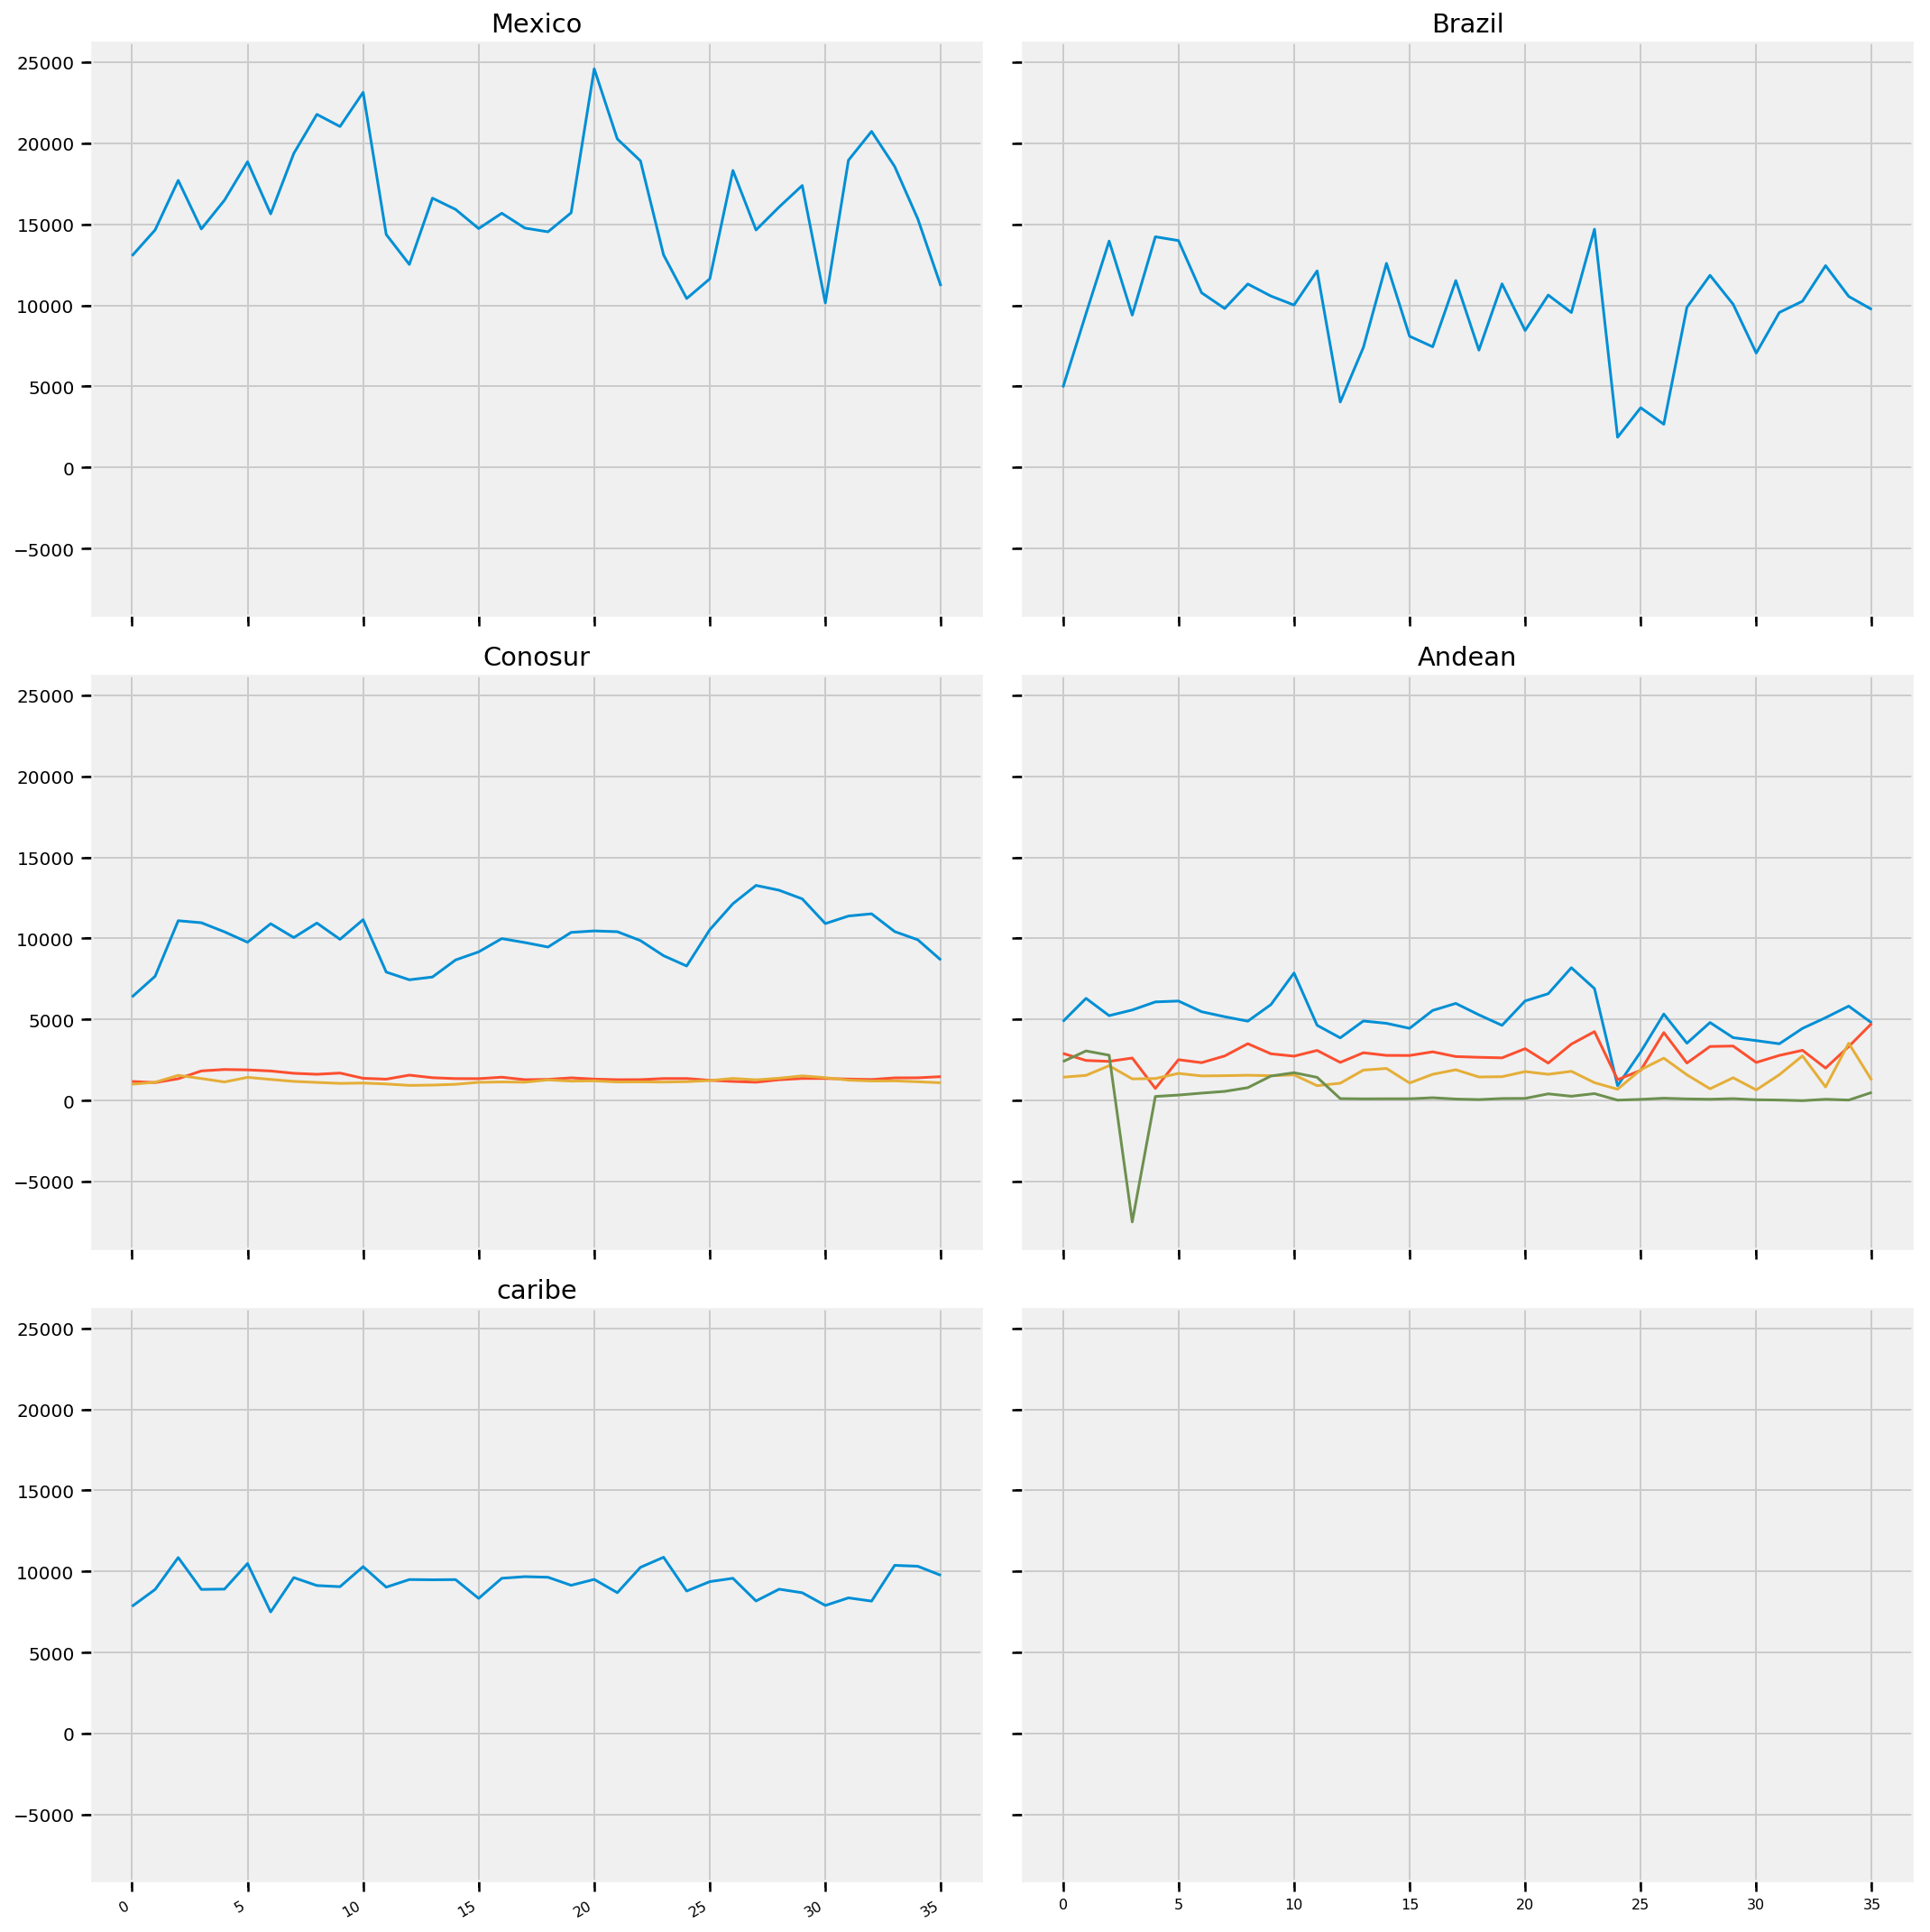

In [304]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig, axes = plt.subplots(nrows=3, ncols=2,sharex=True, sharey=True, figsize=(15,15))
mexico.plot(ax=axes[0, 0], use_index=False, legend=False, title='Mexico', sharey=True);
brazil.plot(ax=axes[0, 1], use_index=False, legend=False, title = 'Brazil', sharey=True);
conosur.plot(ax=axes[1, 0],use_index=False, legend=False, title = 'Conosur', sharey=True);
andean.plot(ax=axes[1, 1],use_index=False, legend = False, title ='Andean', sharey=True);
caribe.plot(ax=axes[2,0], use_index=False, legend=False, title='caribe', sharey=True)
plt.tight_layout()

# Data Preprocessing


# Decomposition

In [81]:
#df.plot(xticks=df.index, rot=65, legend=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels(df[0])
#df.plot(xticks=df.index, rot=65, legend=True)
#plt.show()

y = df
#['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe']
#rcParams['figure.figsize'] = 18, 8

#'Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 
#'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe'


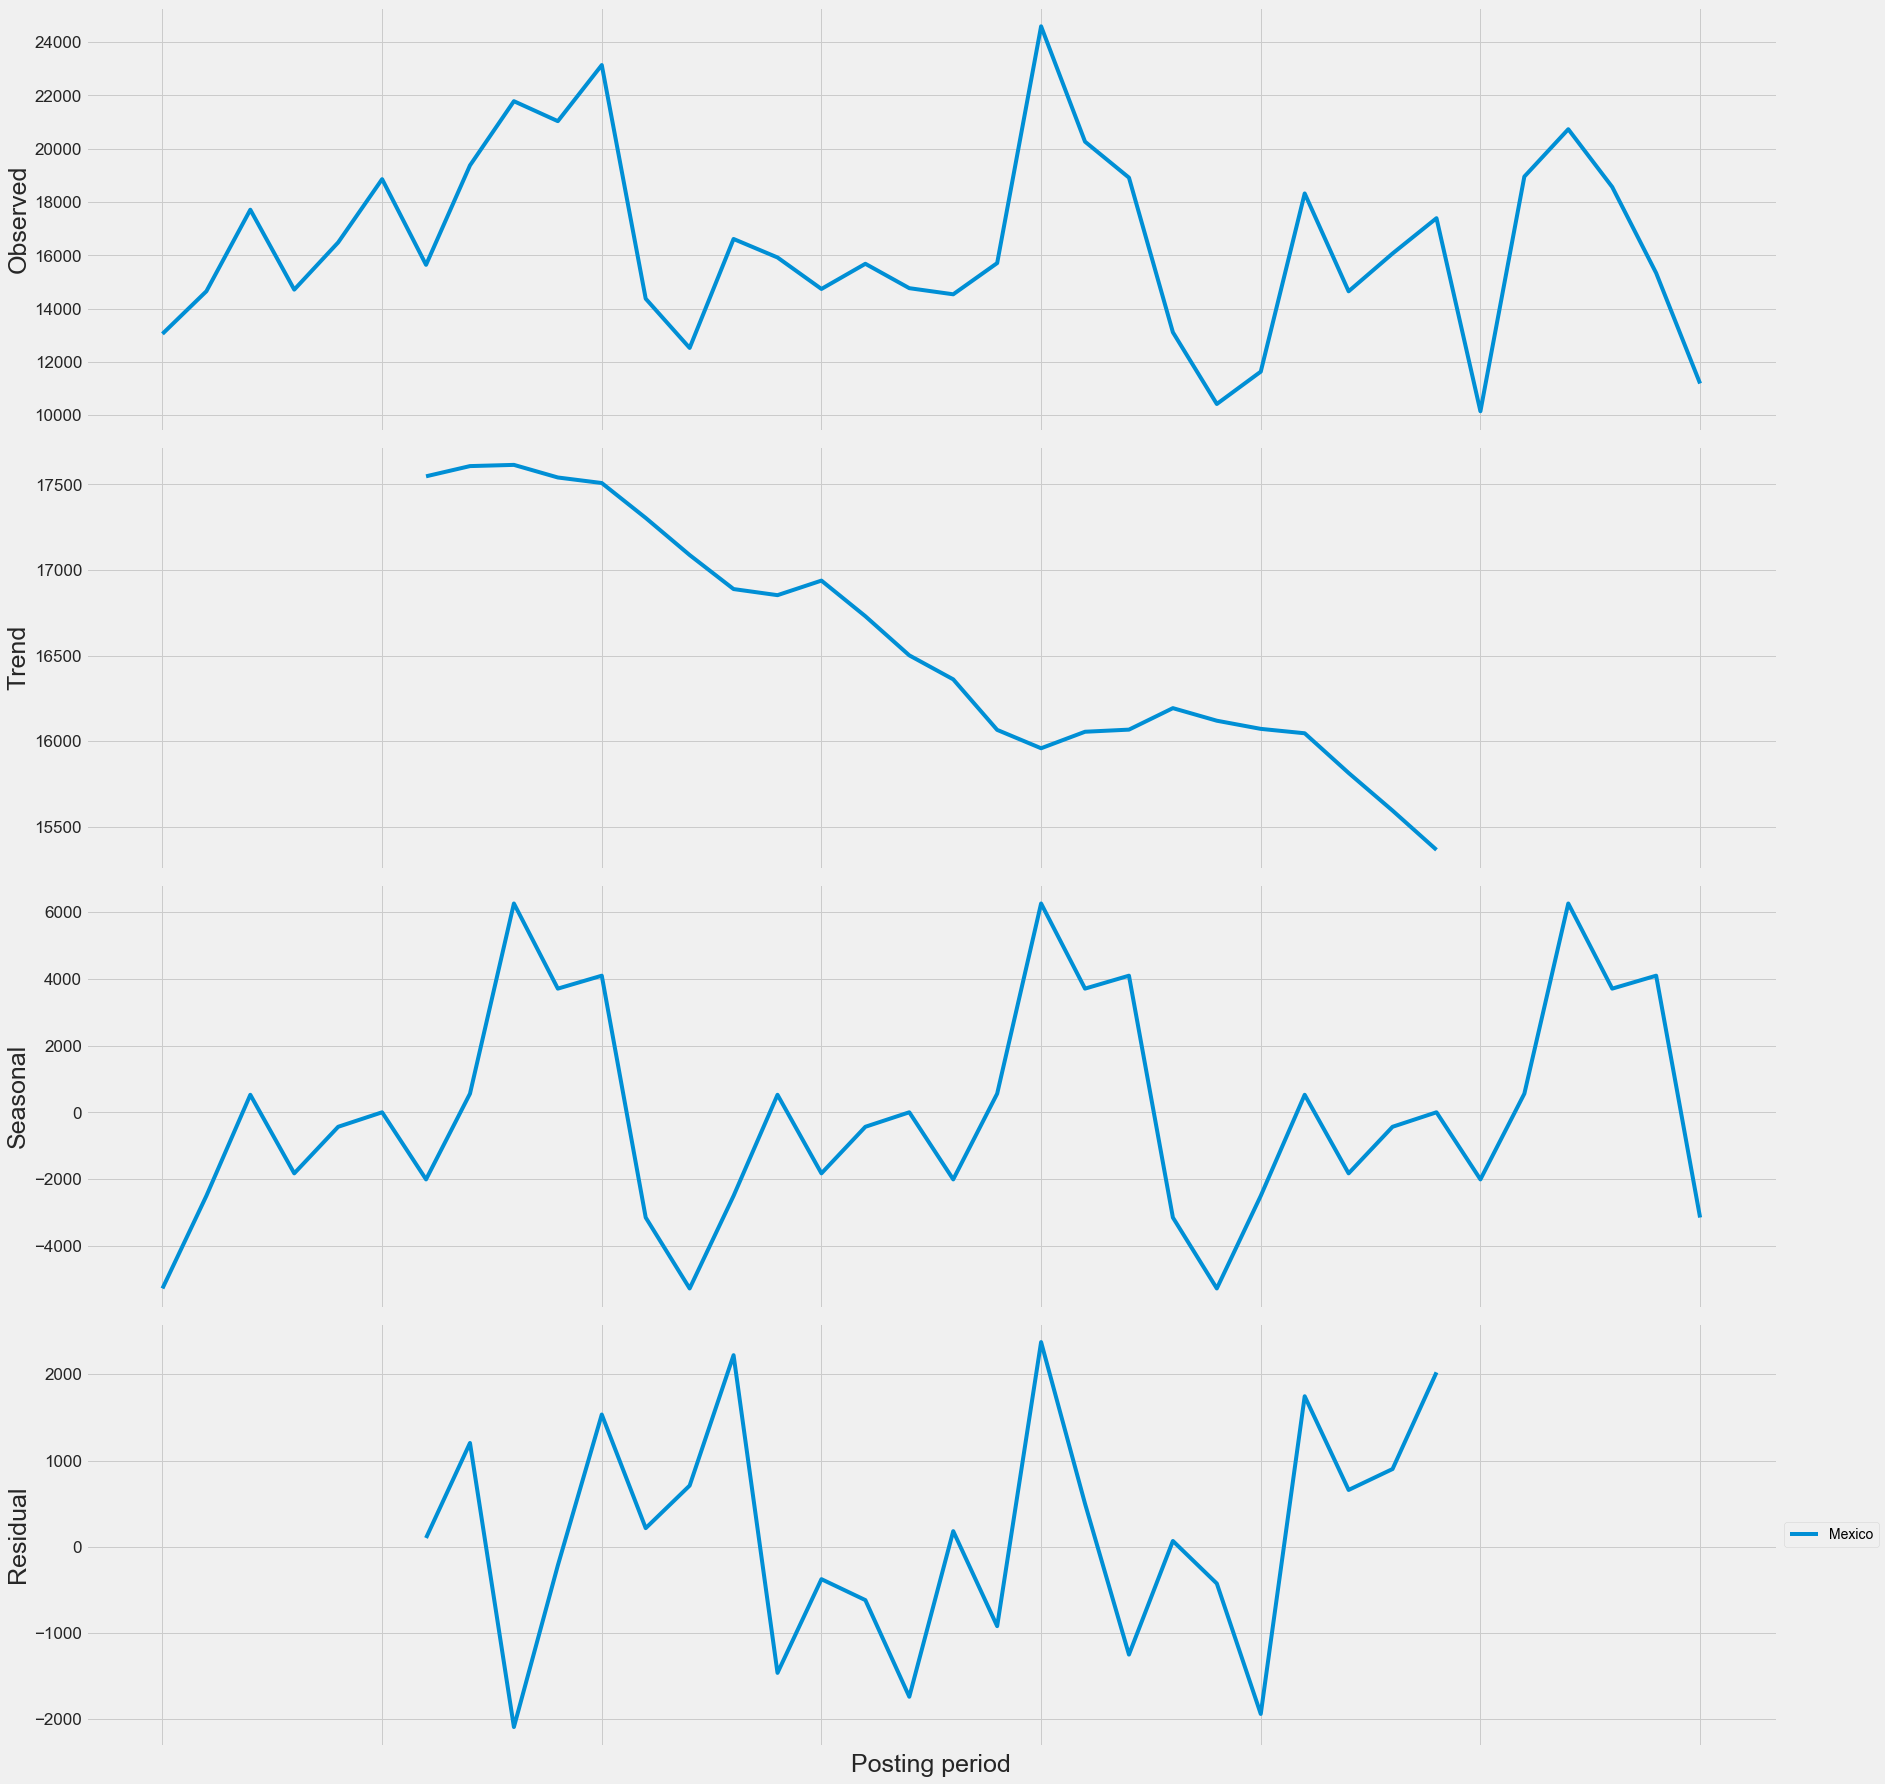

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12)
fig = decomposition.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12)
#print(type(decomposition))

#ax = decomposition.plot(xticks=df.index, rot=65, legend=True)
#ax.set_xticklabels(df['Posting period'])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





In [99]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [110]:
y = df['Mexico']
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:782.7090091967996
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:431.4542331243137
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:445.2415061981367
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:229.06768589511523
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:739.0247574647266
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:415.24129265499414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:446.7275262941341
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:231.06534428101656
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:661.8150280783466
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:430.0871281697508
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:446.4845886268182
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:212.4209965325799
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:641.3186637354908
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:401.22375393988585
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:442.457736306559
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:213.2186400894111
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:681.8193208670777
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:433.3106006726817
ARIMA(1

The above output suggests that ARIMA(1, 1, 1)x(1, 1, 0, 12)12 yields the lowest AIC value of AIC:191.73310695372575. Therefore we should consider this to be optimal option.

# Fitting the ARIMA model

In [124]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1), seasonal_order=(1, 1, 0, 12),enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4564      0.955     -0.478      0.633      -2.329       1.416
ma.L1         -0.5940      1.006     -0.590      0.555      -2.566       1.378
ar.S.L12      -0.4208      1.007     -0.418      0.676      -2.394       1.553
sigma2      8.572e+06   9.83e+06      0.872      0.383   -1.07e+07    2.78e+07


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

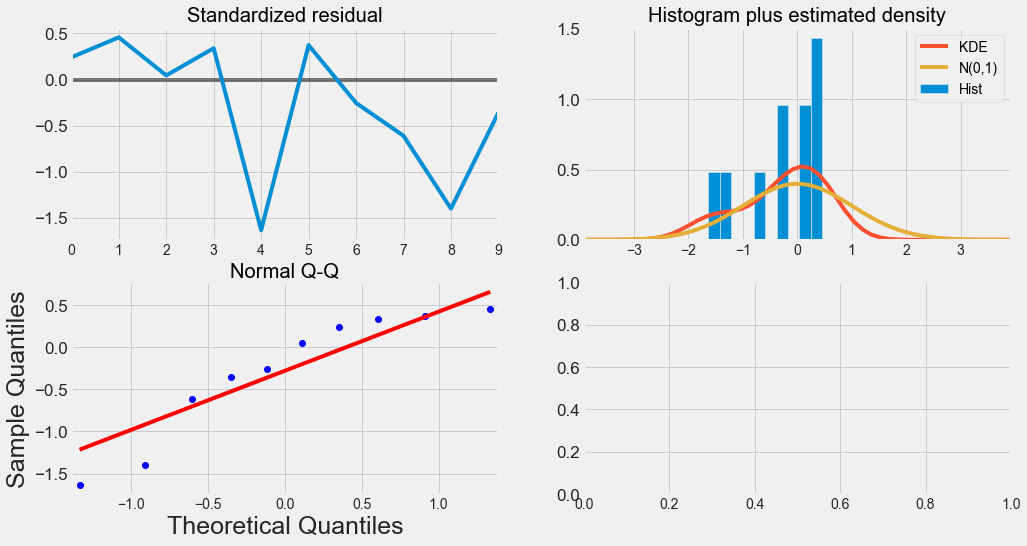

In [127]:
results.plot_diagnostics(figsize=(15,8))
plt.show()

In [131]:

pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

In [138]:
df.index


Index(['01.01.2015', '01.02.2015', '01.03.2015', '01.04.2015', '01.05.2015',
       '01.06.2015', '01.07.2015', '01.08.2015', '01.09.2015', '01.10.2015',
       '01.11.2015', '01.12.2015', '01.01.2016', '01.02.2016', '01.03.2016',
       '01.04.2016', '01.05.2016', '01.06.2016', '01.07.2016', '01.08.2016',
       '01.09.2016', '01.10.2016', '01.11.2016', '01.12.2016', '01.01.2017',
       '01.02.2017', '01.03.2017', '01.04.2017', '01.05.2017', '01.06.2017',
       '01.07.2017', '01.08.2017', '01.09.2017', '01.10.2017', '01.11.2017',
       '01.12.2017'],
      dtype='object', name='Posting period')

In [139]:
df.columns


Index(['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil',
       'Colombia', 'Ecuador', 'Peru', 'Venezuela(Bol.R)', 'Caribe'],
      dtype='object')

In [168]:
df.head()

,Mexico,Argentina,Chile,Other Conosur (Bol/Per/Uru),Brazil,Colombia,Ecuador,Peru,Venezuela(Bol.R),Caribe
01.01.2015,13054.861216,6387.879429,1175.000028,1006.486060,4938.999993,4874.249215,2906.999999,1437.999979,2397.999999,7847.000112
01.02.2015,14653.245782,7665.894889,1106.758264,1125.733670,9493.999981,6302.572298,2470.999999,1552.000016,3058.999994,8890.000061
01.03.2015,17711.860626,11092.400412,1343.099707,1553.252033,13966.000009,5235.863566,2413.999992,2147.528587,2793.999993,10857.495058
01.04.2015,14714.165992,10967.026270,1824.999989,1356.402942,9401.999987,5585.366677,2622.000000,1334.043620,-7490.000002,8892.999932
01.05.2015,16485.796197,10406.698982,1913.999986,1143.423202,14231.999985,6083.215209,744.999991,1355.746533,250.000008,8910.495095


In [153]:
df.loc['01.01.2015', 'Brazil']

4938.999993219961